# Data pre-processing

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.tabular.all import *
from fastai.metrics import * 
from sklearn.metrics import roc_auc_score 


#path = Path('/Users/baranserajelahi/Codes/fraud-detection-pytorch-scikit-fastai/data')
path = Path('/home/jupyter/fraud-detection-pytorch-scikit-fastai/data')

Path.BASE_PATH = path
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 300

In [3]:
train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

In [4]:
train_ss.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
57195,3044195,0,1316341,418.95,W,4806,490.0,150.0,visa,226.0,debit,315.0,87.0,NaN,NaN,aol.com,NaN,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,472.0,NaN,463.0,288.0,288.0,NaN,NaN,NaN,NaN,288.0,NaN,NaN,NaN,NaN,288.0,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312877,3299877,0,7780176,59.00,W,12577,268.0,150.0,visa,166.0,debit,325.0,87.0,4.0,NaN,gmail.com,NaN,5.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0,4.0,0.0,NaN,NaN,330.0,196.0,NaN,NaN,NaN,NaN,400.0,301.0,NaN,NaN,NaN,330.0,T,T,T,M0,F,T,F,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195195,3182195,1,4394717,29.00,W,4693,417.0,150.0,visa,195.0,debit,308.0,87.0,1.0,NaN,yahoo.com,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,8.0,1.0,51.0,51.0,0.0,51.0,0.0,NaN,NaN,NaN,NaN,51.0,51.0,NaN,NaN,NaN,51.0,T,T,T,M0,T,F,F,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21600,3008600,0,572518,24.00,W,7919,194.0,150.0,mastercard,202.0,debit,123.0,87.0,0.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,T,T,M1,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12253,2999253,0,348181,57.95,W,13108,215.0,150.0,visa,226.0,debit,191.0,87.0,27.0,NaN,NaN,NaN,2.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,3.0,0.0,18.0,2.0,484.0,484.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,483.0,NaN,NaN,NaN,NaN,NaN,T,T,T,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train_ss.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'id_01', 'id_02', 'id_03', 'id_04',
       'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12',
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20',
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [12]:
# I had to do this so that the learner would automatically use FlattenedLoss of 
# CrossEntropyLoss() as the loss function. Leaving the dep_var as an int causes 
# FlattenedLoss of MSELoss() to be chosen.
train_ss['isFraud'] = train_ss['isFraud'].astype('category')

In [13]:
train_ss['isFraud']

57195     0
312877    0
195195    1
21600     0
12253     0
         ..
224165    0
322952    1
449491    0
343893    0
125898    0
Name: isFraud, Length: 59054, dtype: category
Categories (2, int64): [0, 1]

In [14]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38'] 
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11']
dep_var = 'isFraud'

In [15]:
train_ss[cat].nunique()

ProductCD           5
card1            6083
card2             499
card3              64
card4               4
card5              81
card6               4
addr1             144
addr2              27
P_emaildomain      59
R_emaildomain      59
M1                  2
M2                  2
M3                  2
M4                  3
M5                  2
M6                  2
M7                  2
M8                  2
M9                  2
DeviceType          2
DeviceInfo        766
id_12               2
id_13              37
id_14              20
id_15               3
id_16               2
id_17              60
id_18              13
id_19             358
id_20             206
id_21             131
id_22              12
id_23               3
id_24               8
id_25             126
id_26              46
id_27               1
id_28               2
id_29               2
id_30              72
id_31             107
id_32               4
id_33             112
id_34               3
id_35     

There are a number of categorical variables where the number of categories has high cardinality, so deep learning might help us in this senerio.

In [16]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_ss['TransactionDT'].max() - train_ss['TransactionDT'].min())*0.8)
cut_off

12579784

In [17]:
cond = train_ss['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [18]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(train_ss, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [19]:
(path/'to_nn.pkl').save(to_nn)

# NN without V*** features

In [3]:
to_nn = (path/'to_nn.pkl').load()

In [5]:
to_nn.items

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,dist1_na,dist2_na,D1_na,D2_na,D3_na,D4_na,D5_na,D6_na,D7_na,D8_na,D9_na,D10_na,D11_na,D12_na,D13_na,D14_na,D15_na,id_01_na,id_02_na,id_03_na,id_04_na,id_05_na,id_06_na,id_07_na,id_08_na,id_09_na,id_10_na,id_11_na
57195,-1.322806,0,-1.245707,1.240415,5,1233,390,30,4,70,3,68,21,-0.183705,-0.092442,3,0,-0.089028,-0.090942,-0.034647,-0.061955,-0.134384,-0.109859,-0.050231,-0.056906,-0.203488,-0.057582,-0.096037,-0.051114,-0.224706,-0.123058,2.468850,-0.280162,9.471498,1.122761,4.260183,-0.145077,-0.097696,-0.154975,0.113073,1.089056,-0.372027,-0.133032,-0.07686,-0.121596,0.805232,0,0,0,0,0,2,0,0,0,0.167473,-0.148303,-0.035881,0.027773,-0.153702,0.186117,-0.000152,0.018447,-0.031211,0.036798,0.117061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,1,1,1,2,2,2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
312877,0.506394,0,0.519150,-0.328971,5,3740,168,30,4,40,3,70,21,-0.200412,-0.092442,17,0,-0.068799,-0.079297,-0.034647,-0.061955,-0.174292,-0.097012,-0.050231,-0.056906,-0.203488,-0.057582,-0.096037,-0.051114,-0.150241,-0.085467,-0.590402,-0.280162,-0.233869,1.378097,2.774099,-0.145077,-0.097696,-0.154975,0.113073,1.751793,1.585534,-0.133032,-0.07686,-0.121596,1.033601,2,2,2,1,1,2,1,2,2,0.167473,-0.148303,-0.035881,0.027773,-0.153702,0.186117,-0.000152,0.018447,-0.031211,0.036798,0.117061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,1,1,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
195195,-0.335527,1,-0.405201,-0.459771,5,1196,317,30,4,51,3,64,21,-0.212942,-0.092442,54,0,-0.095771,-0.085119,-0.034647,-0.061955,-0.214200,-0.109859,-0.050231,-0.056906,-0.141792,-0.057582,-0.086453,-0.051114,-0.180027,-0.141853,-0.259847,-0.634464,-0.404513,-0.318066,-0.391905,-0.145077,-0.097696,-0.154975,0.113073,-0.313342,-0.261222,-0.133032,-0.07686,-0.121596,-0.483425,2,2,2,1,2,1,1,2,2,0.167473,-0.148303,-0.035881,0.027773,-0.153702,0.186117,-0.000152,0.018447,-0.031211,0.036798,0.117061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,1,1,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
21600,-1.577460,0,-1.448797,-0.481571,5,2236,94,30,3,57,3,6,21,-0.217119,-0.092442,0,0,-0.095771,-0.090942,-0.034647,-0.061955,-0.214200,-0.122707,-0.050231,-0.056906,-0.203488,-0.057582,-0.096037,-0.051114,-0.232152,-0.141853,-0.590402,-0.280162,-0.233869,-0.482211,-0.246527,-0.145077,-0.097696,-0.154975,0.113073,-0.615123,-0.637960,-0.133032,-0.07686,-0.121596,-0.760731,2,2,2,2,2,1,0,0,0,0.167473,-0.148303,-0.035881,0.027773,-0.153702,0.186117,-0.000152,0.018447,-0.031211,0.036798,0.117061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
12253,-1.644330,0,-1.510049,-0.333549,5,3916,115,30,4,70,3,26,21,-0.104347,-0.092442,0,0,-0.089028,-0.085119,-0.034647,-0.061955,-0.094476,-0.109859,-0.050231,-0.056906,-0.141792,-0.057582,-0.076868,-0.051114,-0.105562,-0.123058,2.546627,2.700589,-0.255200,-0.482211,-0.246527,-0.145077,-0.097696,-0.154975,0.113073,2.242928,-0.372027,-0.133032,-0.07686,-0.121596,-0.499737,2,2,2,0,0,1,0,0,0,0.167473,-0.148303,-0.035881,0.027773,-0.153702,0.186117,-0.000152,0.018447,-0.031211,0.036798,0.117061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [4]:
dls = to_nn.dataloaders(1024)

In [5]:
F1_score = F1Score()
recall = Recall()
precision = Precision()
roc_score = RocAucBinary()
metrics = [accuracy, precision, recall, F1_score, roc_score]

Let's also use the ActivationStats callback to diagnose the condition of our neural network.

In [6]:
from fastai.callback.hook import *

In [23]:
tabular_learner?

In [28]:
learn = tabular_learner(dls, [500, 250], metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

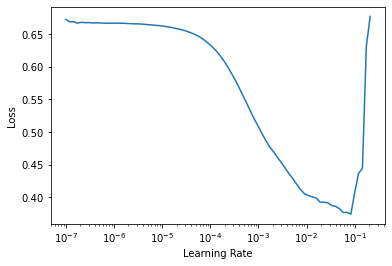

In [29]:
lr_min, lr_steep = learn.lr_find()

In [30]:
lr_min, lr_steep

(0.00831763744354248, 0.0005754399462603033)

In [31]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.260107,0.305726,0.965905,0.400000,0.005510,0.010870,0.720341,00:05
1,0.150259,0.136139,0.968153,0.623656,0.159780,0.254386,0.805321,00:05
2,0.107061,0.127867,0.963563,0.434343,0.236915,0.306595,0.811424,00:05
3,0.083093,0.127346,0.963001,0.421569,0.236915,0.303351,0.809176,00:05


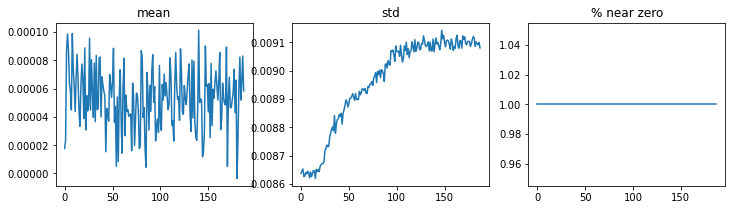

In [32]:
learn.activation_stats.plot_layer_stats(1)

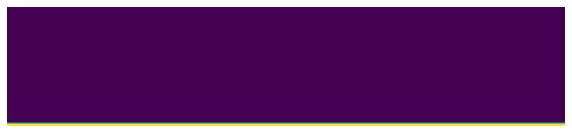

In [33]:
learn.activation_stats.color_dim(1)

(1.4454397387453355e-06, 1.0964781722577754e-06)

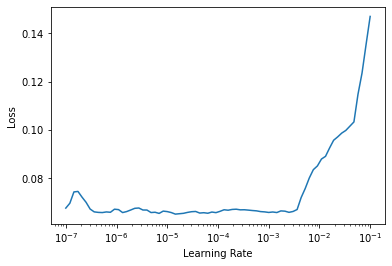

In [36]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [37]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.066253,0.127134,0.963750,0.436842,0.228650,0.300181,0.807679,00:05
1,0.066185,0.127167,0.964031,0.443243,0.225895,0.299270,0.806966,00:04
2,0.066150,0.127271,0.963563,0.430851,0.223140,0.294011,0.806968,00:04
3,0.065994,0.127208,0.964312,0.450549,0.225895,0.300917,0.806350,00:04


# NN with V*** features

In [38]:
train_s = pd.read_csv(path/'train_s.csv', index_col=[0], low_memory=False)
train_s['isFraud'] = train_s['isFraud'].astype('category')

In [45]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38']
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11','V1', 'V2','V3','V4','V5','V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124',
 'V125',
 'V126',
 'V127',
 'V128',
 'V129',
 'V130',
 'V131',
 'V132',
 'V133',
 'V134',
 'V135',
 'V136',
 'V137',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166',
 'V167',
 'V168',
 'V169',
 'V170',
 'V171',
 'V172',
 'V173',
 'V174',
 'V175',
 'V176',
 'V177',
 'V178',
 'V179',
 'V180',
 'V181',
 'V182',
 'V183',
 'V184',
 'V185',
 'V186',
 'V187',
 'V188',
 'V189',
 'V190',
 'V191',
 'V192',
 'V193',
 'V194',
 'V195',
 'V196',
 'V197',
 'V198',
 'V199',
 'V200',
 'V201',
 'V202',
 'V203',
 'V204',
 'V205',
 'V206',
 'V207',
 'V208',
 'V209',
 'V210',
 'V211',
 'V212',
 'V213',
 'V214',
 'V215',
 'V216',
 'V217',
 'V218',
 'V219',
 'V220',
 'V221',
 'V222',
 'V223',
 'V224',
 'V225',
 'V226',
 'V227',
 'V228',
 'V229',
 'V230',
 'V231',
 'V232',
 'V233',
 'V234',
 'V235',
 'V236',
 'V237',
 'V238',
 'V239',
 'V240',
 'V241',
 'V242',
 'V243',
 'V244',
 'V245',
 'V246',
 'V247',
 'V248',
 'V249',
 'V250',
 'V251',
 'V252',
 'V253',
 'V254',
 'V255',
 'V256',
 'V257',
 'V258',
 'V259',
 'V260',
 'V261',
 'V262',
 'V263',
 'V264',
 'V265',
 'V266',
 'V267',
 'V268',
 'V269',
 'V270',
 'V271',
 'V272',
 'V273',
 'V274',
 'V275',
 'V276',
 'V277',
 'V278',
 'V279',
 'V280',
 'V281',
 'V282',
 'V283',
 'V284',
 'V285',
 'V286',
 'V287',
 'V288',
 'V289',
 'V290',
 'V291',
 'V292',
 'V293',
 'V294',
 'V295',
 'V296',
 'V297',
 'V298',
 'V299',
 'V300',
 'V301',
 'V302',
 'V303',
 'V304',
 'V305',
 'V306',
 'V307',
 'V308',
 'V309',
 'V310',
 'V311',
 'V312',
 'V313',
 'V314',
 'V315',
 'V316',
 'V317',
 'V318',
 'V319',
 'V320',
 'V321',
 'V322',
 'V323',
 'V324',
 'V325',
 'V326',
 'V327',
 'V328',
 'V329',
 'V330',
 'V331',
 'V332',
 'V333',
 'V334',
 'V335',
 'V336',
 'V337','V338','V339']
dep_var='isFraud'


In [46]:
assert len(cat)+len(cont)==(len(train_s.columns)-1)

In [42]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_s['TransactionDT'].max() - train_s['TransactionDT'].min())*0.8)
cut_off

12579548

In [43]:
cond = train_s['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [47]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(train_s, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [48]:
(path/'to_nn_full.pkl').save(to_nn)

In [49]:
dls = to_nn.dataloaders(1024)

In [51]:
learn = tabular_learner(dls, layers=[500,250], metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [52]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(6, 4)
    (1): Embedding(5663, 202)
    (2): Embedding(499, 52)
    (3): Embedding(68, 17)
    (4): Embedding(5, 4)
    (5): Embedding(72, 18)
    (6): Embedding(5, 4)
    (7): Embedding(139, 25)
    (8): Embedding(30, 11)
    (9): Embedding(60, 16)
    (10): Embedding(61, 16)
    (11): Embedding(3, 3)
    (12): Embedding(3, 3)
    (13): Embedding(3, 3)
    (14): Embedding(4, 3)
    (15): Embedding(3, 3)
    (16): Embedding(3, 3)
    (17): Embedding(3, 3)
    (18): Embedding(3, 3)
    (19): Embedding(3, 3)
    (20): Embedding(3, 3)
    (21): Embedding(804, 68)
    (22): Embedding(3, 3)
    (23): Embedding(37, 12)
    (24): Embedding(22, 9)
    (25): Embedding(4, 3)
    (26): Embedding(3, 3)
    (27): Embedding(56, 15)
    (28): Embedding(14, 7)
    (29): Embedding(345, 42)
    (30): Embedding(207, 32)
    (31): Embedding(114, 23)
    (32): Embedding(8, 5)
    (33): Embedding(4, 3)
    (34): Embedding(7, 5)
    (35): Embedding(108

(0.001096478197723627, 0.0003311311302240938)

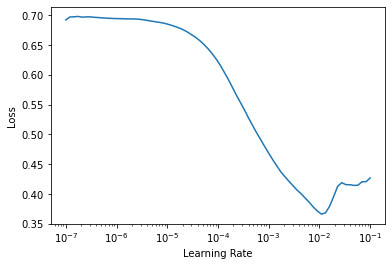

In [54]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [55]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.247370,0.393123,0.953830,0.343558,0.282116,0.309820,0.713047,00:16
1,0.141890,0.151331,0.968357,0.653631,0.294710,0.406250,0.824860,00:16
2,0.102818,0.111202,0.969189,0.660000,0.332494,0.442211,0.856364,00:16
3,0.082404,0.111632,0.969282,0.671958,0.319899,0.433447,0.852742,00:16


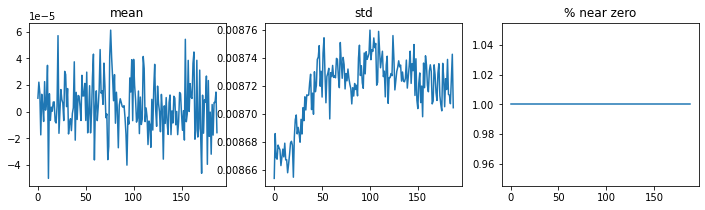

In [56]:
learn.activation_stats.plot_layer_stats(1)

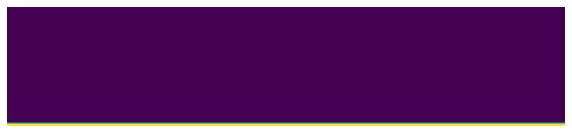

In [58]:
learn.activation_stats.color_dim(1)

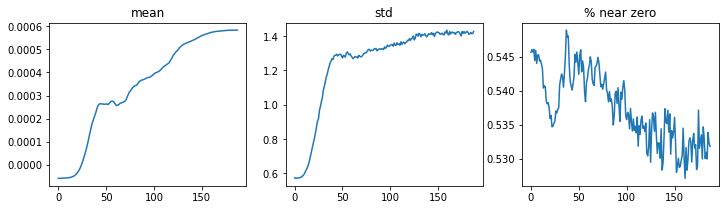

In [57]:
learn.activation_stats.plot_layer_stats(-2)

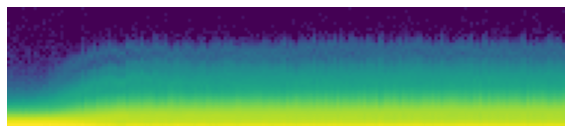

In [59]:
learn.activation_stats.color_dim(-2)

(6.309573450380412e-08, 5.754399353463668e-06)

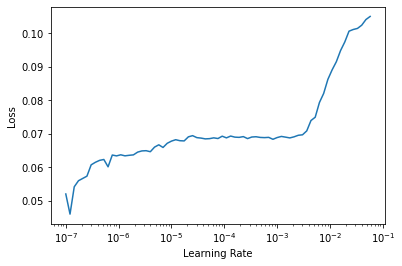

In [60]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep 

In [61]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.066997,0.111516,0.969097,0.688623,0.289673,0.407801,0.850253,00:16
1,0.066922,0.111131,0.970207,0.714286,0.314861,0.437063,0.850927,00:16
2,0.066701,0.111992,0.969652,0.704142,0.299748,0.420495,0.851029,00:16
3,0.066022,0.111923,0.969375,0.677419,0.317380,0.432247,0.851815,00:16


In [81]:
learn.save('nn_nf_full_stage-1')

Path('models/nn_nf_full_stage-1.pth')

In [84]:
learn.load('nn_nf_full_stage-1')

# Imbalance

## RandomUnderSampler without V*** features

In [90]:
from imblearn.under_sampling import RandomUnderSampler

In [92]:
rus = RandomUnderSampler(random_state=42)

In [93]:
train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

In [95]:
df_nn, s_isFraud = rus.fit_resample(train_ss.drop(['isFraud'], axis=1), train_ss['isFraud'])

In [96]:
df_nn['isFraud'] = s_isFraud

In [97]:
df_nn

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,3152871,3535439,25.000,W,9152,468.0,150.0,visa,100.0,debit,337.0,87.0,37.0,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,64.0,64.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,64.0,64.0,NaN,NaN,NaN,64.0,T,T,T,M0,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,3440461,11578943,57.950,W,16717,111.0,150.0,mastercard,224.0,debit,436.0,87.0,4.0,NaN,NaN,NaN,2.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,10.0,2.0,608.0,608.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,607.0,563.0,NaN,NaN,NaN,607.0,T,T,T,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3454083,12020917,36.119,C,17613,555.0,121.0,mastercard,137.0,credit,NaN,NaN,NaN,NaN,hotmail.com,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,M0,NaN,NaN,NaN,NaN,NaN,-15.0,133625.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,64.0,NaN,Found,NotFound,225.0,NaN,266.0,595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,NotFound,NaN,chrome 63.0 for ios,NaN,NaN,NaN,F,F,T,F,mobile,NaN,0
3,3117399,2584737,83.950,W,1431,492.0,150.0,visa,226.0,debit,343.0,87.0,NaN,NaN,NaN,NaN,4.0,9.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,0.0,3.0,0.0,25.0,3.0,300.0,300.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,311.0,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,3307050,7950570,209.950,W,5643,543.0,150.0,mastercard,224.0,debit,231.0,87.0,1.0,NaN,gmail.com,NaN,3.0,5.0,0.0,0.0,2.0,3.0,0.0,0.0,3.0,0.0,3.0,0.0,9.0,2.0,368.0,368.0,60.0,494.0,60.0,NaN,NaN,NaN,NaN,494.0,118.0,NaN,NaN,NaN,494.0,T,T,F,NaN,NaN,T,T,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4269,3214687,5392241,150.000,H,11233,321.0,150.0,visa,195.0,debit,308.0,87.0,NaN,NaN,anonymous.com,gmail.com,9.0,9.0,0.0,3.0,0.0,4.0,0.0,9.0,0.0,5.0,9.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,206462.0,NaN,NaN,5.0,-9.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-360.0,New,NotFound,166.0,13.0,321.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.2.1,mobile safari 11.0,32.0,2208x1242,match_status:1,T,F,F,T,mobile,iOS Device,1
4270,3460284,12238741,77.000,W,7585,553.0,150.0,visa,226.0,credit,441.0,87.0,6.0,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,T,T,T,M0,T,F,F,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4271,3382413,9934143,212.074,C,9917,142.0,185.0,visa,138.0,debit,NaN,NaN,NaN,NaN,gmai

In [100]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38'] 
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11']
dep_var = 'isFraud'

In [101]:
df_nn['isFraud'] = df_nn['isFraud'].astype('category')

In [102]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((df_nn['TransactionDT'].max() - df_nn['TransactionDT'].min())*0.8)
cut_off

cond = df_nn['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [103]:
to_nn.xs.shape

(4274, 122)

In [104]:
dls = to_nn.dataloaders(1024)

In [105]:
F1_score = F1Score()
recall = Recall()
precision = Precision()
roc_score = RocAucBinary()
metrics = [accuracy, precision, recall, F1_score, roc_score]

In [106]:
learn = tabular_learner(dls, [500, 250], metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.006918309628963471, 0.005248074419796467)

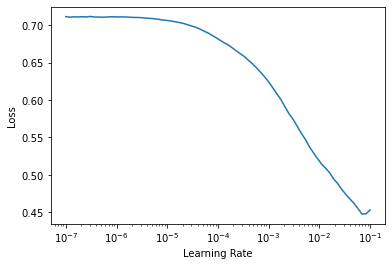

In [107]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [108]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.684675,0.678450,0.627005,0.574733,0.889807,0.698378,0.722951,00:00
1,0.596959,0.649652,0.637701,0.589494,0.834711,0.690992,0.743473,00:00
2,0.509418,0.617898,0.649733,0.600000,0.834711,0.698157,0.756538,00:00
3,0.448042,0.610639,0.648396,0.598814,0.834711,0.697353,0.758277,00:00


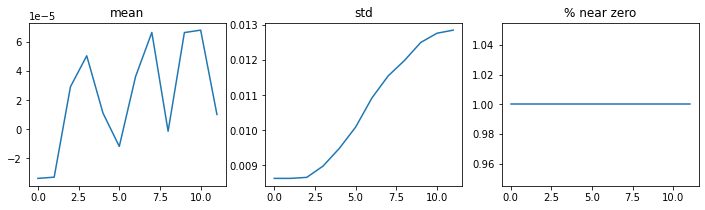

In [109]:
learn.activation_stats.plot_layer_stats(1)

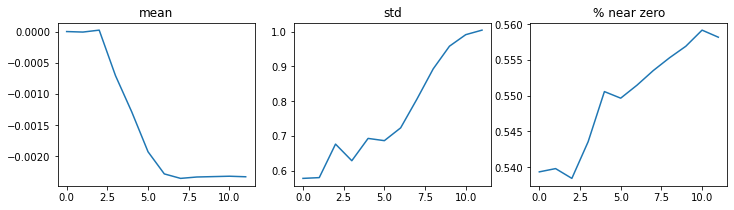

In [110]:
learn.activation_stats.plot_layer_stats(-2)

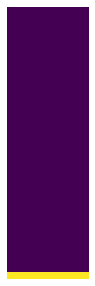

In [111]:
learn.activation_stats.color_dim(1)

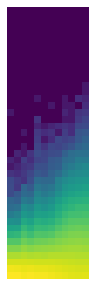

In [112]:
learn.activation_stats.color_dim(-2)

(0.0013182567432522773, 0.005248074419796467)

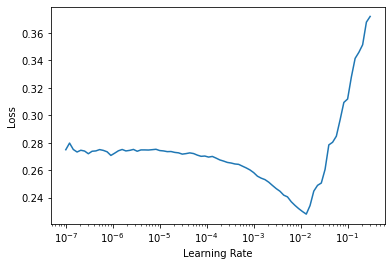

In [113]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [114]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.269255,0.614674,0.645722,0.593511,0.856749,0.701240,0.747301,00:00
1,0.259341,0.597135,0.660428,0.609218,0.837466,0.705336,0.756774,00:00
2,0.237375,0.608463,0.651070,0.599609,0.845730,0.701714,0.753411,00:00
3,0.216387,0.602743,0.659091,0.605882,0.851240,0.707904,0.760259,00:00


(0.0006309573538601399, 0.0030199517495930195)

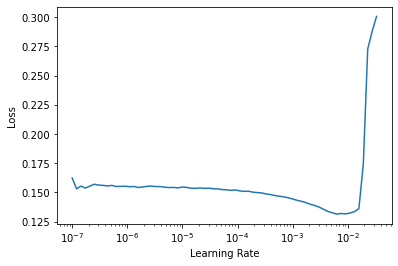

In [115]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [116]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.148673,0.594121,0.667112,0.613546,0.848485,0.712139,0.769175,00:00
1,0.142320,0.605065,0.649733,0.599606,0.837466,0.698851,0.767164,00:00
2,0.129155,0.604300,0.661765,0.613169,0.820937,0.702002,0.768702,00:00
3,0.118145,0.601616,0.671123,0.622129,0.820937,0.707838,0.774105,00:00


In [117]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.086892,0.647039,0.647059,0.594646,0.856749,0.702032,0.776359,00:00
1,0.079076,0.670808,0.648396,0.595785,0.856749,0.702825,0.791421,00:00
2,0.071056,0.725156,0.644385,0.589981,0.876033,0.705100,0.791263,00:00
3,0.064516,0.701281,0.659091,0.603053,0.870523,0.712514,0.796852,00:00


In [118]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.041752,0.636388,0.703209,0.657718,0.809917,0.725926,0.808780,00:00
1,0.039798,0.829701,0.661765,0.603383,0.884298,0.717318,0.789954,00:00
2,0.038205,0.718116,0.721925,0.670330,0.840220,0.745721,0.813044,00:00
3,0.036291,0.742071,0.713904,0.663020,0.834711,0.739024,0.814812,00:00


(5.754399462603033e-05, 1.0964781722577754e-06)

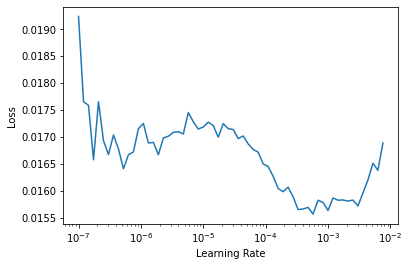

In [120]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

## RandomUnderSampler with V*** features

In [162]:
rus = RandomUnderSampler(random_state=42)

train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

df_nn, s_isFraud = rus.fit_resample(train_ss.drop(['isFraud'], axis=1), train_ss['isFraud'])

df_nn['isFraud'] = s_isFraud

In [163]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38'] 
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11']
dep_var = 'isFraud'

df_nn['isFraud'] = df_nn['isFraud'].astype('category')

# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((df_nn['TransactionDT'].max() - df_nn['TransactionDT'].min())*0.8)
cut_off

cond = df_nn['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [164]:
to_nn.xs.shape

(4274, 122)

In [165]:
dls = to_nn.dataloaders(1024)

F1_score = F1Score()
recall = Recall()
precision = Precision()
roc_score = RocAucBinary()
metrics = [accuracy, precision, recall, F1_score, roc_score]

learn = tabular_learner(dls, [500, 250], metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.003981071710586548, 0.0030199517495930195)

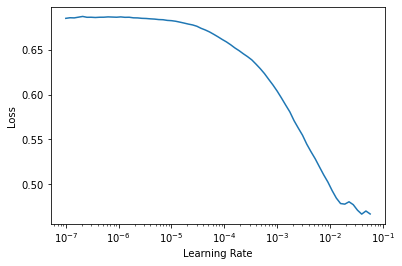

In [166]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [167]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.648716,0.681043,0.640374,0.867188,0.305785,0.452138,0.711864,00:00
1,0.569037,0.657814,0.635027,0.592975,0.790634,0.677686,0.717727,00:00
2,0.492051,0.652547,0.609626,0.564195,0.859504,0.681223,0.700204,00:00
3,0.431771,0.647911,0.610963,0.563380,0.881543,0.687433,0.708733,00:00


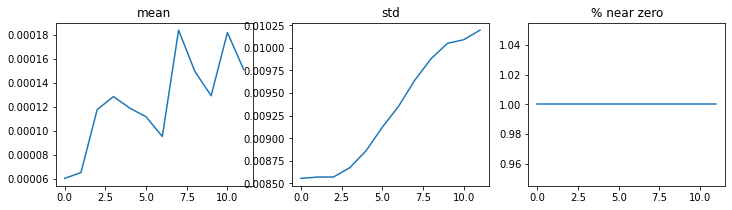

In [168]:
learn.activation_stats.plot_layer_stats(1)

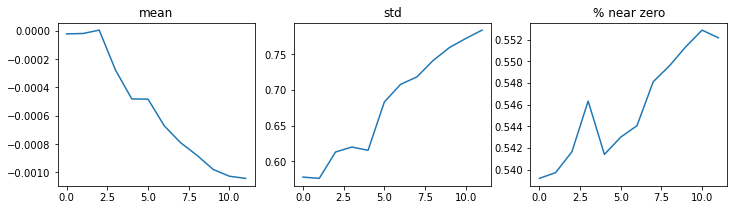

In [169]:
learn.activation_stats.plot_layer_stats(-2)

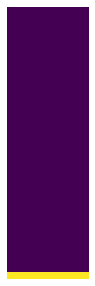

In [170]:
learn.activation_stats.color_dim(1)

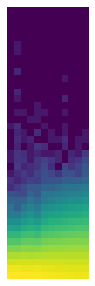

In [171]:
learn.activation_stats.color_dim(-2)

(0.0005248074419796466, 0.001737800776027143)

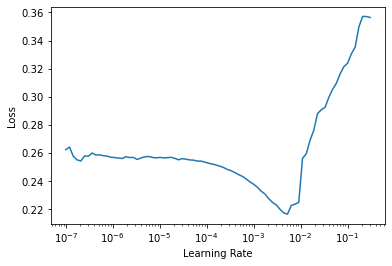

In [172]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [173]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.258553,0.643853,0.612300,0.563258,0.895317,0.691489,0.717871,00:00
1,0.239723,0.637914,0.612300,0.563040,0.898072,0.692144,0.728833,00:00
2,0.219287,0.636913,0.609626,0.561955,0.887052,0.688034,0.733047,00:00
3,0.200391,0.646205,0.610963,0.561856,0.900826,0.692063,0.734256,00:00


## RandomOverSampler without V*** features

In [121]:
from imblearn.over_sampling import RandomOverSampler

In [122]:
ros = RandomOverSampler(random_state=42)

In [124]:
train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

In [125]:
df_nn, s_isFraud = ros.fit_resample(train_s.drop(['isFraud'], axis=1), train_s['isFraud'])

In [126]:
df_nn['isFraud'] = s_isFraud

In [127]:
df_nn

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,...,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,3054118,1529352,50.000,S,6394,225.0,150.0,mastercard,224.0,debit,203.0,87.0,NaN,0.0,NaN,gmail.com,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,374.0,374.0,NaN,NaN,NaN,NaN,NaN,623.666687,0.666666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,83923.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,NaN,216.0,181.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows,0
1,3286740,7411014,150.000,R,10356,399.0,150.0,american express,185.0,credit,269.0,87.0,NaN,NaN,twc.com,comcast.net,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,252.750000,0.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [128]:
df_nn['isFraud'] = df_nn['isFraud'].astype('category')

In [129]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((df_nn['TransactionDT'].max() - df_nn['TransactionDT'].min())*0.8)
cut_off

cond = df_nn['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [131]:
to_nn.xs.shape

(113770, 122)

In [132]:
dls = to_nn.dataloaders(1024)

In [133]:
F1_score = F1Score()
recall = Recall()
precision = Precision()
roc_score = RocAucBinary()
metrics = [accuracy, precision, recall, F1_score, roc_score]

learn = tabular_learner(dls, [500, 250], metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.0033113110810518267, 0.17378008365631104)

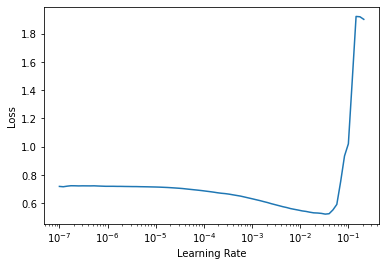

In [134]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [135]:
learn.fit_one_cycle(4, 5e-3, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.225357,1.343319,0.721160,0.856718,0.529179,0.654244,0.812483,00:10
1,0.093822,3.051910,0.671933,0.931691,0.368986,0.528618,0.803031,00:10
2,0.033335,4.531536,0.626030,0.947405,0.264541,0.413595,0.805088,00:10
3,0.010392,4.575874,0.648764,0.952635,0.310918,0.468823,0.821948,00:10


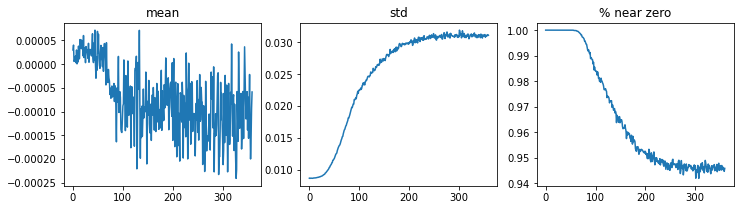

In [136]:
learn.activation_stats.plot_layer_stats(1)

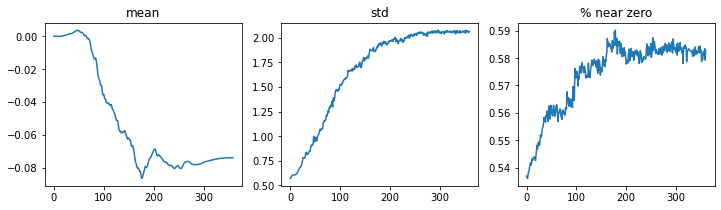

In [138]:
learn.activation_stats.plot_layer_stats(-2)

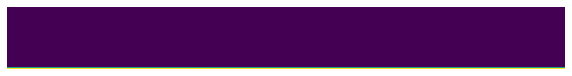

In [139]:
learn.activation_stats.color_dim(1)

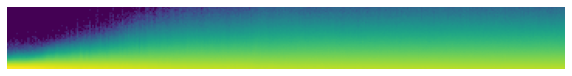

In [140]:
learn.activation_stats.color_dim(-2)

(9.120108734350651e-06, 1.0964781722577754e-06)

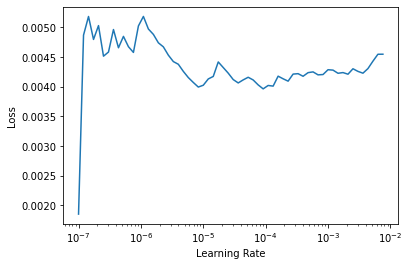

In [141]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [142]:
learn.fit_one_cycle(4, 5e-6)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.003921,4.539184,0.650739,0.951618,0.315459,0.473841,0.821662,00:10
1,0.004023,4.508808,0.651992,0.951459,0.318164,0.476866,0.822330,00:10
2,0.003896,4.555540,0.649680,0.951570,0.313237,0.471324,0.822842,00:10
3,0.003896,4.630338,0.647464,0.951983,0.308406,0.465883,0.821759,00:10


## RandomOverSampler with V*** features

In [174]:
ros = RandomOverSampler(random_state=42)

train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

df_nn, s_isFraud = ros.fit_resample(train_s.drop(['isFraud'], axis=1), train_s['isFraud'])

df_nn['isFraud'] = s_isFraud

In [175]:
df_nn['isFraud'] = df_nn['isFraud'].astype('category')

# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((df_nn['TransactionDT'].max() - df_nn['TransactionDT'].min())*0.8)
cut_off

cond = df_nn['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

## Class weighting NN without V*** features

In [76]:
df = pd.read_csv(path/'train_s.csv', index_col=[0])

In [77]:
class_count_df = df.groupby('isFraud').count()['TransactionID']

n_0, n_1 = class_count_df[0], class_count_df[1]

w_0 = (n_0 + n_1) / (2.0 * n_0)
w_1 = (n_0 + n_1) / (2.0 * n_1)

In [78]:
to_nn = (path/'to_nn.pkl').load()

In [79]:
dls = to_nn.dataloaders(1024)

weights = [w_0, w_1]
class_weights=torch.FloatTensor(weights).cuda()
loss_func = CrossEntropyLossFlat(weight=class_weights)

learn = tabular_learner(dls, layers=[500, 250], loss_func=loss_func, metrics=metrics)
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.002754228748381138, 0.2089296132326126)

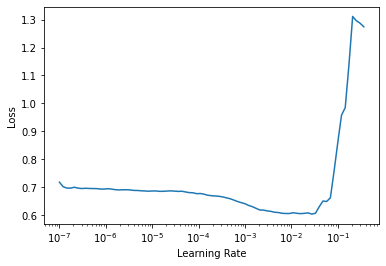

In [80]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [81]:
learn.fit_one_cycle(4, 1e-3 , wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.552330,0.601514,0.900431,0.158203,0.446281,0.233598,0.797834,00:02
1,0.437665,0.563379,0.775478,0.098975,0.691460,0.173163,0.799152,00:02
2,0.325204,0.737715,0.772387,0.091663,0.639118,0.160332,0.771871,00:02
3,0.243819,0.765977,0.838797,0.116817,0.570248,0.193911,0.782841,00:02


## Class weighting NN with V*** features 

In [82]:
df = pd.read_csv(path/'train_s.csv', index_col=[0])

In [83]:
class_count_df = df.groupby('isFraud').count()['TransactionID']

n_0, n_1 = class_count_df[0], class_count_df[1]

w_0 = (n_0 + n_1) / (2.0 * n_0)
w_1 = (n_0 + n_1) / (2.0 * n_1)

In [84]:
to_nn = (path/'to_nn_full.pkl').load()

In [85]:
dls = to_nn.dataloaders(1024)

weights = [w_0, w_1]
class_weights=torch.FloatTensor(weights).cuda()
loss_func = CrossEntropyLossFlat(weight=class_weights)

learn = tabular_learner(dls, layers=[500, 250], loss_func=loss_func, metrics=metrics)
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.002290867641568184, 0.17378008365631104)

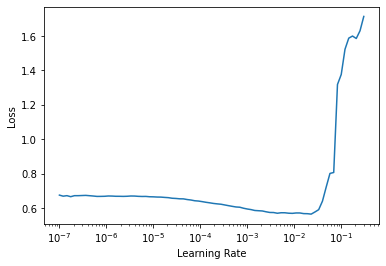

In [86]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [87]:
learn.fit_one_cycle(4, 1e-3 , wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.503012,0.654526,0.856403,0.150212,0.624685,0.242188,0.828217,00:08
1,0.410471,0.549829,0.903127,0.210854,0.596977,0.311637,0.845451,00:08
2,0.317116,0.646505,0.844097,0.142619,0.647355,0.233743,0.830388,00:08
3,0.246206,0.723487,0.863249,0.156825,0.622166,0.250507,0.829358,00:08
